# Automatic emittance measurement at LCLS-II
In this case we have 4 quadrupoles, 3 that are used to minimize the incoming beam and
 the fourth to perform the quad scan measurement.

In [1]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../../")
    sys.path.append("../")

## Set up image diagnostic

In [2]:
from scripts.image import ImageDiagnostic
import yaml

fname = "otr_diagnostic.yml"
image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
print(image_diagnostic.yaml())

{screen_name: 'OTRS:HTR:330', array_data_suffix: 'Image:ArrayData', array_n_cols: 'Image:ArraySize0_RBV',
  array_n_rows: 'Image:ArraySize1_RBV', resolution: RESOLUTION, background_file: null,
  save_image_location: null, roi: null, min_log_intensity: 4.0, bounding_box_half_width: 3.0,
  wait_time: 1.0, n_fitting_restarts: 1, visualize: true, testing: true}



In [3]:
from scripts.automatic_emittance import ScreenEmittanceMeasurement, BeamlineConfig

drift_length = 2.2
beamline_config = BeamlineConfig(
    scan_quad_pv="QUAD:HTR:120:BCTRL",
    scan_quad_range=[-4.48035,4.479],
    scan_quad_length=0.1244,
    transport_matrix_x = [[1.0, drift_length],[0.0, 1.0]],
    transport_matrix_y = [[1.0, drift_length],[0.0, 1.0]],
    beam_energy=0.06641461763347117
)


measurement = ScreenEmittanceMeasurement(
    image_diagnostic=image_diagnostic,
    beamline_config=beamline_config,
    run_dir=".",
    secondary_observables=["SOLN:GUNB:212:BCTRL",
                   "SOLN:GUNB:823:BCTRL",
                   "QUAD:GUNB:212:1:BCTRL",
                   "QUAD:GUNB:212:2:BCTRL",
                   "QUAD:GUNB:823:1:BCTRL",
                   "QUAD:GUNB:823:2:BCTRL",
                   "QUAD:HTR:120:BCTRL",
                   "QUAD:HTR:140:BCTRL",
                   "QUAD:HTR:300:BCTRL",
                   "QUAD:HTR:320:BCTRL",
                   "BEND:HTR:480:BACT"]
)

measurement.dump_yaml()

In [4]:
print(measurement.yaml())

image_diagnostic: {screen_name: 'OTRS:HTR:330', array_data_suffix: 'Image:ArrayData',
  array_n_cols: 'Image:ArraySize0_RBV', array_n_rows: 'Image:ArraySize1_RBV', resolution: RESOLUTION,
  background_file: null, save_image_location: null, roi: null, min_log_intensity: 4.0,
  bounding_box_half_width: 3.0, wait_time: 1.0, n_fitting_restarts: 1, visualize: true,
  testing: true}
beamline_config:
  scan_quad_pv: QUAD:HTR:120:BCTRL
  scan_quad_range: [-4.48035, 4.479]
  scan_quad_length: 0.1244
  pv_to_integrated_gradient: 1.0
  transport_matrix_x:
  - [1.0, 2.2]
  - [0.0, 1.0]
  transport_matrix_y:
  - [1.0, 2.2]
  - [0.0, 1.0]
  beam_energy: 0.06641461763347117
minimum_log_intensity: 4.0
wait_time: 2.0
n_shots: 3
run_dir: .
secondary_observables: ['SOLN:GUNB:212:BCTRL', 'SOLN:GUNB:823:BCTRL', 'QUAD:GUNB:212:1:BCTRL',
  'QUAD:GUNB:212:2:BCTRL', 'QUAD:GUNB:823:1:BCTRL', 'QUAD:GUNB:823:2:BCTRL', 'QUAD:HTR:120:BCTRL',
  'QUAD:HTR:140:BCTRL', 'QUAD:HTR:300:BCTRL', 'QUAD:HTR:320:BCTRL', 'BEND:

## Make background measurement

In [5]:
if False:
    measurement.image_diagnostic.measure_background(
        n_measurements=10, file_location=measurement.run_dir
    )

## (Optional) Test screen measurement

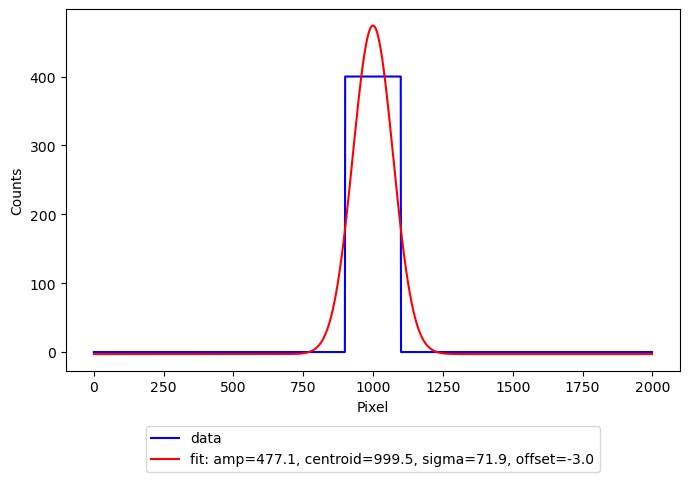

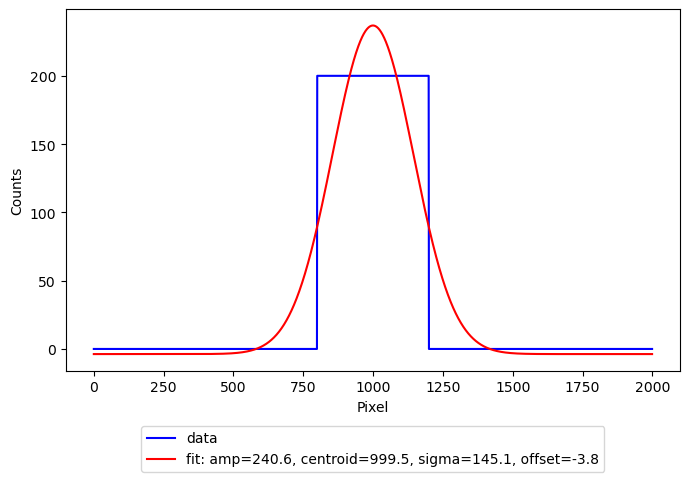

{'Cx': 999.5000189583848,
 'Cy': 999.5002244931399,
 'Sx': 71.86602192729283,
 'Sy': 145.09795676788187,
 'bb_penalty': -513.5696683288127,
 'total_intensity': 80000.0,
 'log10_total_intensity': 4.903089986991944}

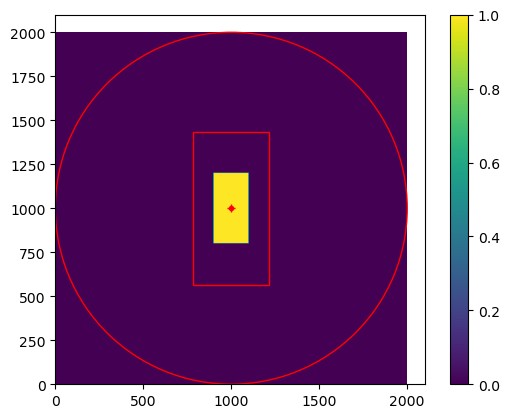

In [6]:
test_results = measurement.image_diagnostic.test_measurement()
test_results

## initialize measurement

In [7]:
# check vocs
measurement.measurement_vocs

VOCS(variables={'QUAD:HTR:120:BCTRL': [-4.48035, 4.479]}, constraints={'bb_penalty': ['LESS_THAN', 0.0], 'log10_total_intensity': ['GREATER_THAN', 4.0]}, objectives={}, constants={}, observables=['S_x_mm', 'S_y_mm'])

## Do quad scan

In [8]:
#results, emit_xopt = measurement.run()